In [1]:
import matplotlib
from pathlib import Path
from matplotlib import pyplot as plt
import skimage.io
import cv2
from PIL import Image



In [2]:
# glob the images folder for .tif files
image_files = Path('images').glob('*.tif')
image_files_list = list(image_files)
# images that end with DAPI.tif
dapi_files = sorted([x for x in image_files_list if x.name.endswith('DAPI.tif')])
# images that end with GFP.tif
gfp_files = sorted([x for x in image_files_list if x.name.endswith('GFP.tif')])
# images that end with T.tif
t_files = sorted([x for x in image_files_list if x.name.endswith('TRANS.tif')])
# images that aren't in any of the above categories
other_files = sorted([x for x in image_files_list if x not in dapi_files and x not in gfp_files and x not in t_files])



In [3]:
png_out_folder = Path('png_out')
png_out_folder.mkdir(exist_ok=True, parents=True)

for img in image_files_list:
    # use pil
    img_pil = Image.open(img)
    img_pil.save(png_out_folder / (img.stem + '.png'))
    


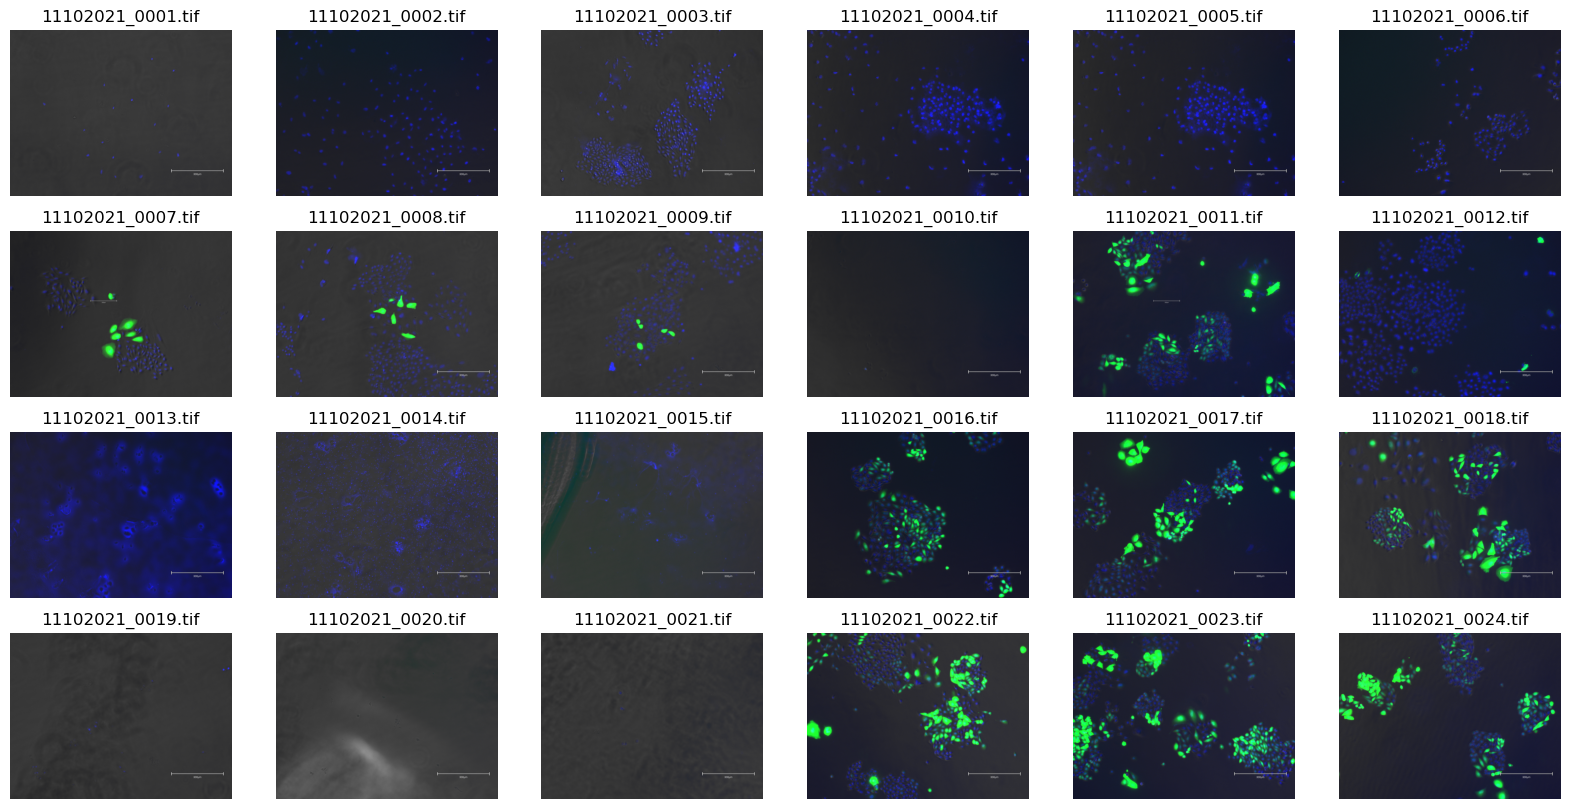

In [4]:

other_files = sorted(other_files)

# 24 images total
# make a 4x6 grid
fig, ax = plt.subplots(4, 6, figsize=(20, 10))
# loop through the images
for i, image in enumerate(other_files):
    # read the image
    img = skimage.io.imread(image)
    # get the row and column
    row = i // 6
    col = i % 6
    # plot the image
    ax[row, col].imshow(img, cmap='gray')
    # turn off the axis
    ax[row, col].axis('off')
    # add the title
    ax[row, col].set_title(image.name)

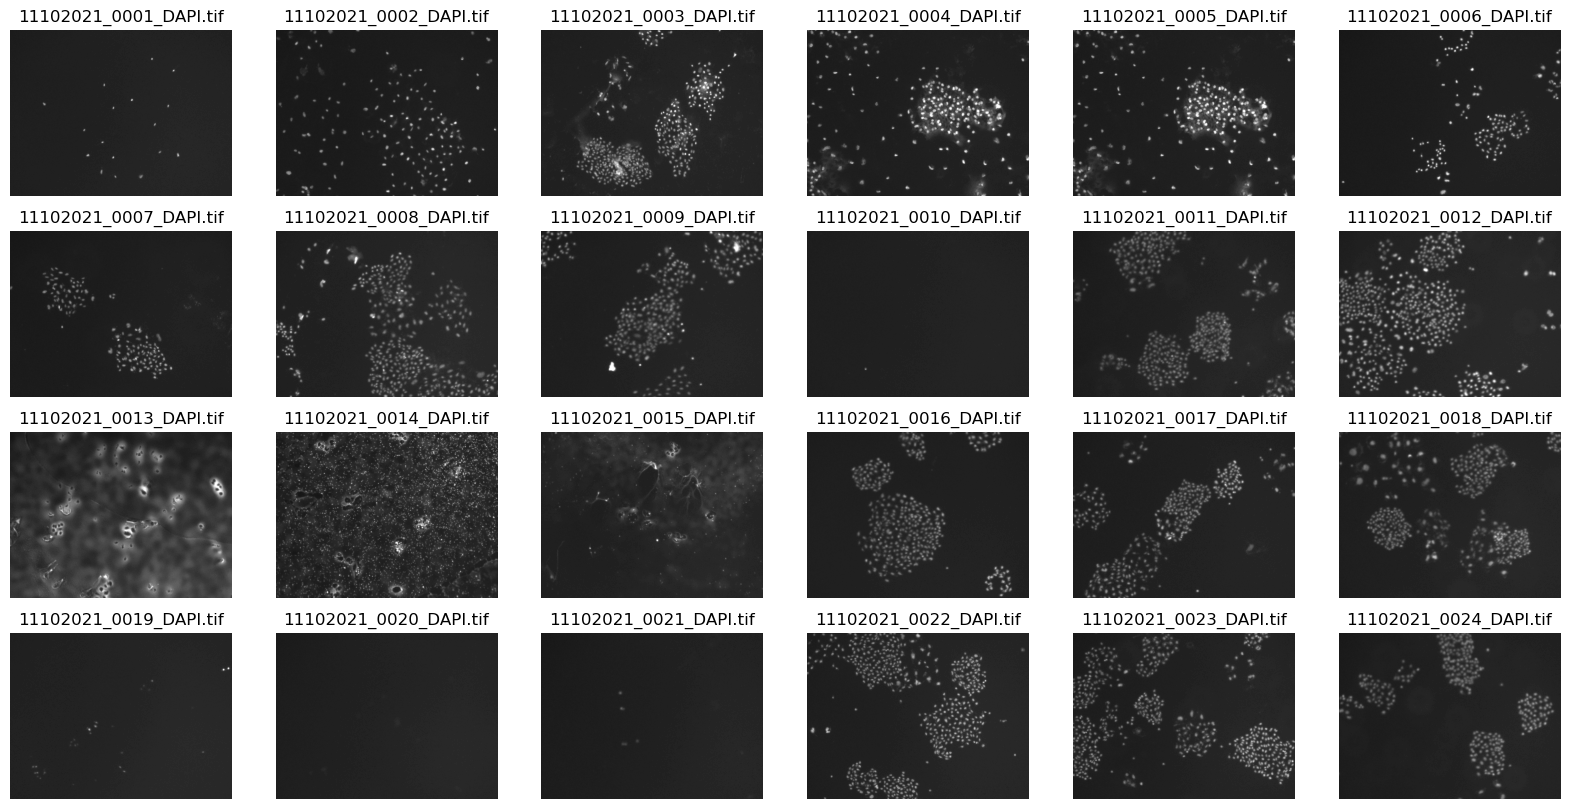

In [5]:

# 24 images total
# make a 4x6 grid
fig, ax = plt.subplots(4, 6, figsize=(20, 10))
# loop through the images
for i, image in enumerate(sorted(dapi_files)):
    # read the image
    img = skimage.io.imread(image)
    # get the row and column
    row = i // 6
    col = i % 6
    # plot the image
    ax[row, col].imshow(img, cmap='gray')
    # turn off the axis
    ax[row, col].axis('off')
    # add the title
    ax[row, col].set_title(image.name)

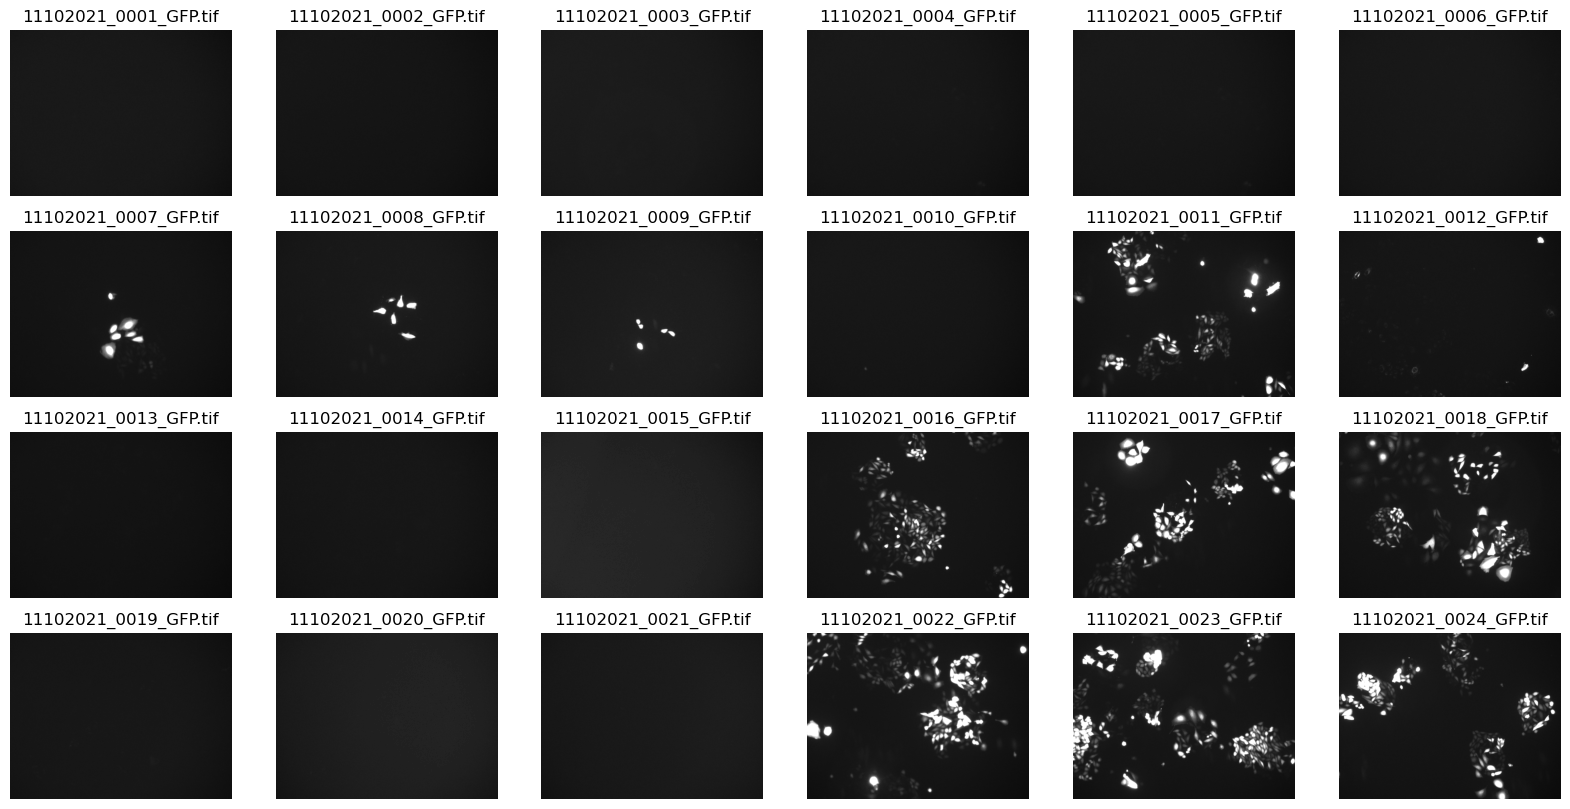

In [6]:

# 24 images total
# make a 4x6 grid
fig, ax = plt.subplots(4, 6, figsize=(20, 10))
# loop through the images
for i, image in enumerate(sorted(gfp_files)):
    # read the image
    img = skimage.io.imread(image)
    # get the row and column
    row = i // 6
    col = i % 6
    # plot the image
    ax[row, col].imshow(img, cmap='gray')
    # turn off the axis
    ax[row, col].axis('off')
    # add the title
    ax[row, col].set_title(image.name)

In [7]:

def count_gfp_positive(dapi, gfp):
    og_img = cv2.imread(str(dapi))
    small_img = cv2.resize(og_img, (0, 0), fx=0.25, fy=0.25)
    img = small_img[:,:,0]
    ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    all_contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    gfp_img = cv2.imread(str(gfp))

    gfp_img = gfp_img[:,:,1]
    gfp_img = cv2.resize(gfp_img, (0, 0), fx=0.25, fy=0.25)
    ret, gfp_thresh = cv2.threshold(gfp_img, 50, 255, cv2.THRESH_BINARY)
    # plt.imshow(thresh)

    gfp_positive = cv2.bitwise_and(thresh, gfp_thresh)
    gfp_contours, hierarchy = cv2.findContours(gfp_positive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    vis_thresh = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    vis_thresh[thresh==255] = [0, 0, 255]

    return len(gfp_contours), len(all_contours), gfp_positive, vis_thresh




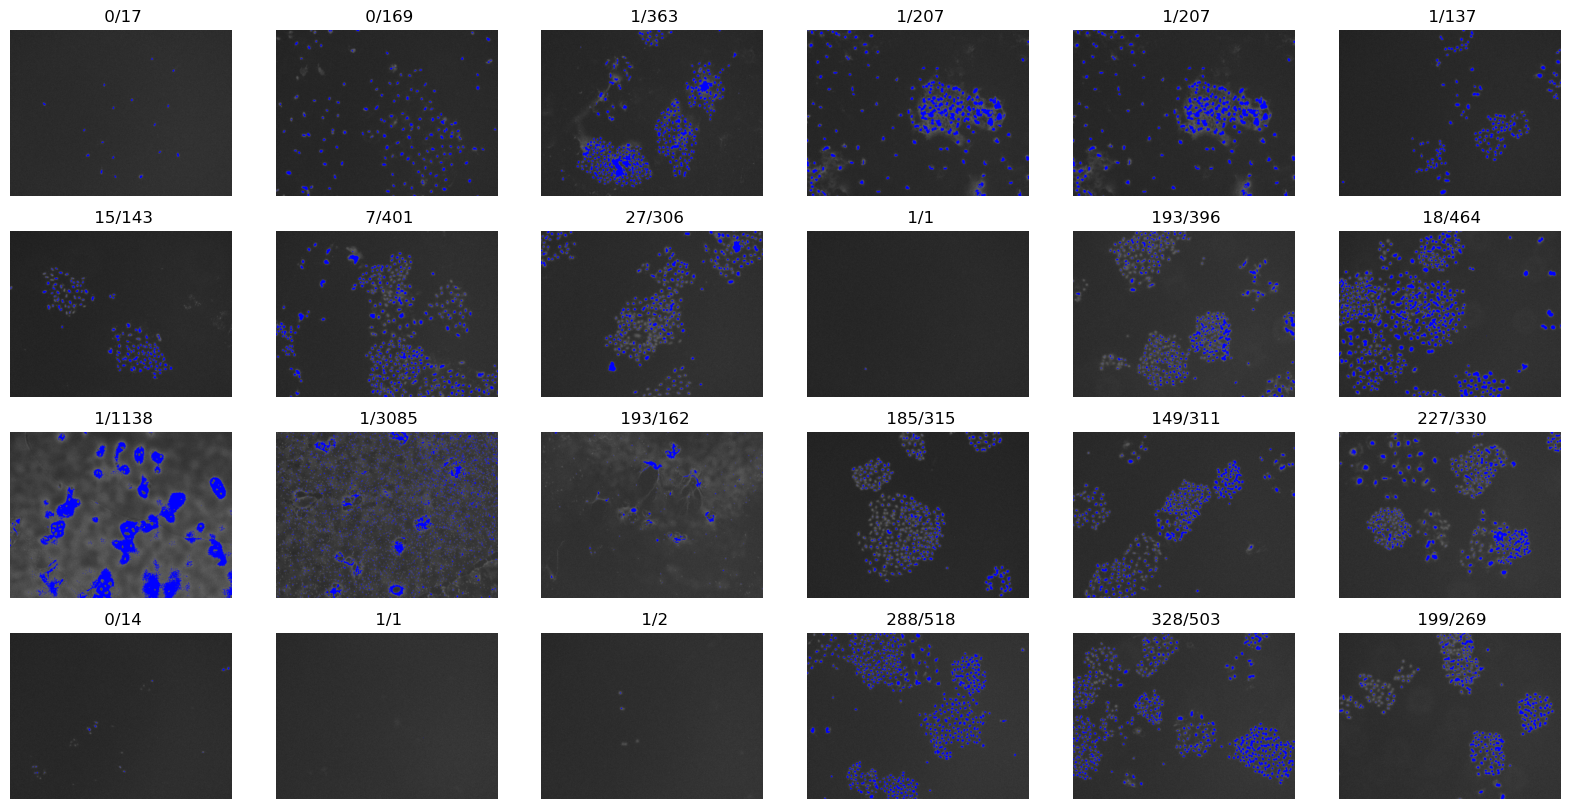

In [8]:

fig, ax = plt.subplots(4, 6, figsize=(20, 10))
for i, image in enumerate(sorted(dapi_files)):

    positive, all, gfp, thresh = count_gfp_positive(dapi_files[i], gfp_files[i])

    row = i // 6
    col = i % 6
    ax[row, col].imshow(thresh)
    ax[row, col].axis('off')
    ax[row, col].set_title(f' {positive}/{all}')

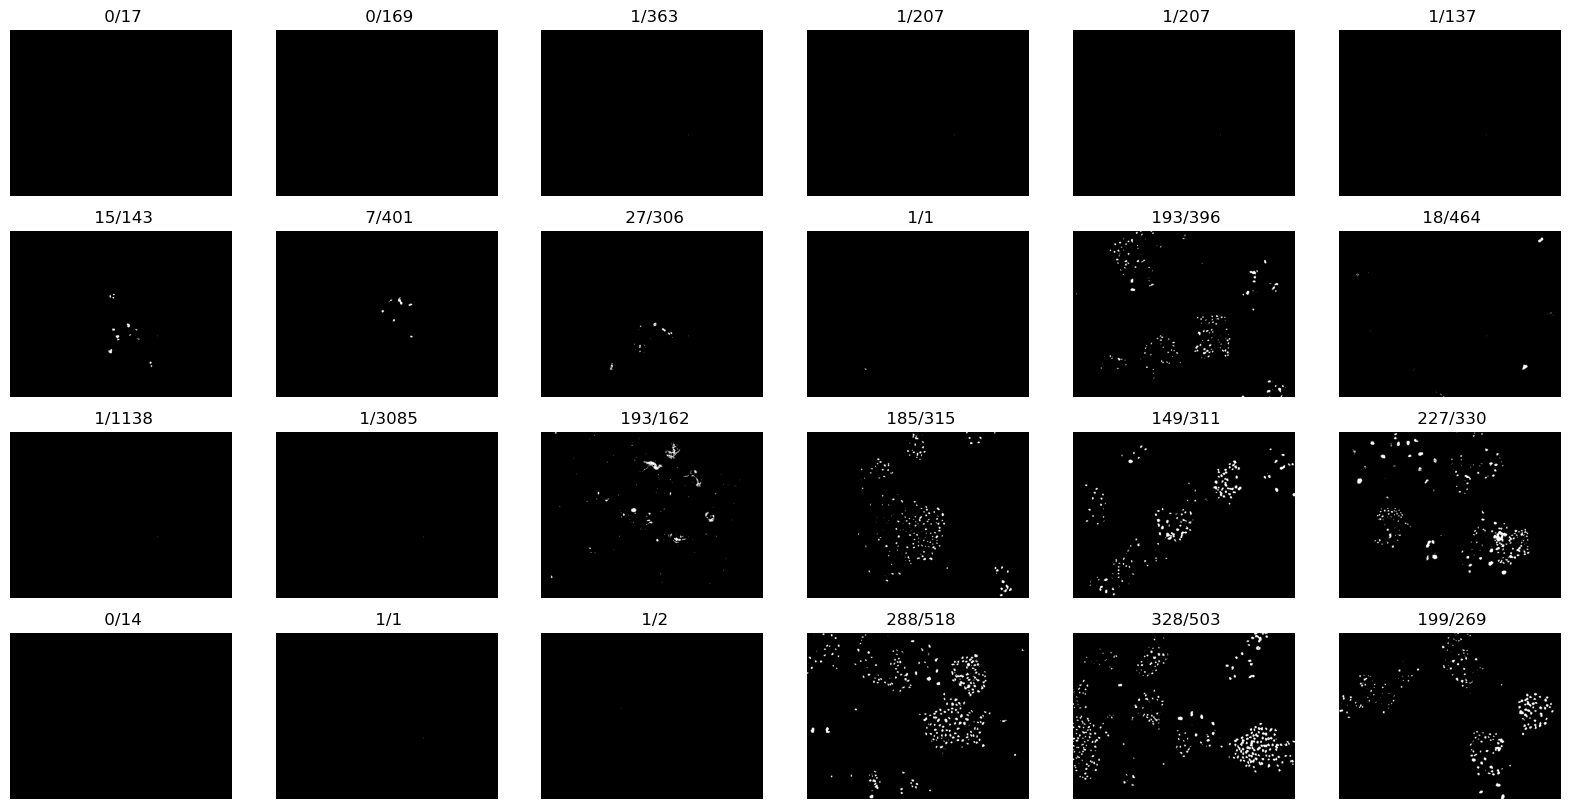

In [9]:
data = [count_gfp_positive(dapi_files[i], gfp_files[i]) for i in range(24)]

fig, ax = plt.subplots(4, 6, figsize=(20, 10))
for i, image in enumerate(sorted(dapi_files)):

    positive, all, gfp, thresh = count_gfp_positive(dapi_files[i], gfp_files[i])

    row = i // 6
    col = i % 6
    ax[row, col].imshow(gfp, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title(f' {positive}/{all}')
    

311
149


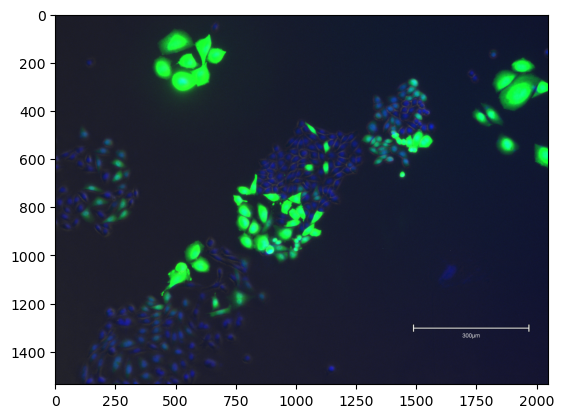

In [10]:
from PIL import Image

og_img = cv2.imread(str(dapi_files[16]))
small_img = cv2.resize(og_img, (0, 0), fx=0.25, fy=0.25)
img = small_img[:,:,0]
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

gfp_img = cv2.imread(str(gfp_files[16]))

gfp_img = gfp_img[:,:,1]
gfp_img = cv2.resize(gfp_img, (0, 0), fx=0.25, fy=0.25)
ret, gfp_thresh = cv2.threshold(gfp_img, 50, 255, cv2.THRESH_BINARY)
# plt.imshow(thresh)

gfp_positive = cv2.bitwise_and(thresh, gfp_thresh)
contours, hierarchy = cv2.findContours(gfp_positive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

# # draw the contours on the original image
# cv2.drawContours(small_img, contours, -1, (0, 255, 0), 1)
# plt.imshow(small_img)

# show other_files[16]
plt.imshow(Image.open(other_files[16]))

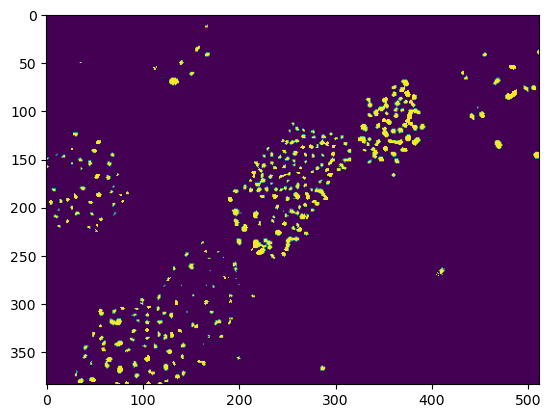

In [11]:
plt.imshow(thresh)


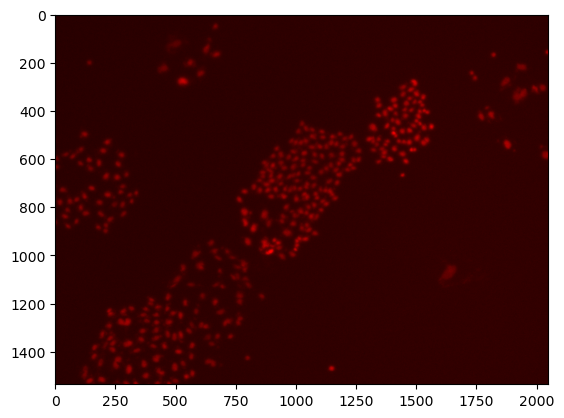

In [12]:

og_img = cv2.imread(str(dapi_files[16]))

plt.imshow(og_img)


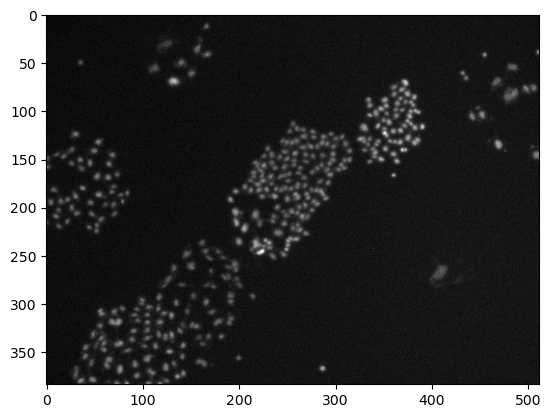

In [13]:
img = og_img.copy()

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[:,:,0]

# resize to 1/4 of the original size
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)


# img = cv2.GaussianBlur(img,(2,2),0)

# show the image
plt.imshow(img, cmap='gray')

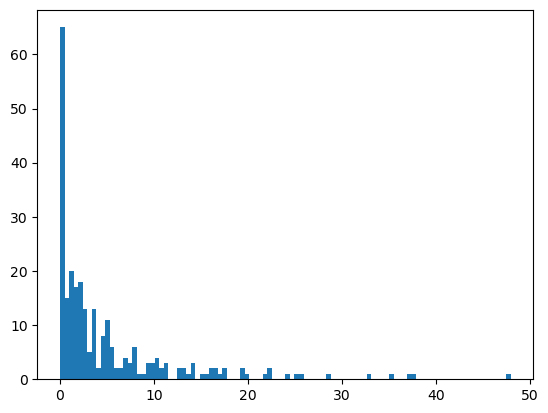

259


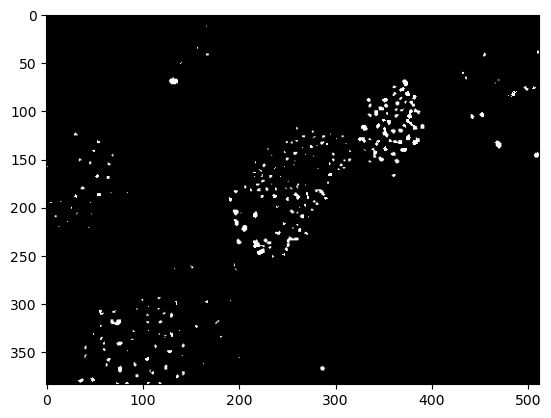

In [14]:

# img to CV_8UC1

import numpy as np


thresh_img = img.copy()

ret, thresh = cv2.threshold(thresh_img, 120, 255, cv2.THRESH_BINARY)

# find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# print historgram of contour areas
areas = [cv2.contourArea(c) for c in contours]
plt.hist(areas, bins=100, range=(0, max(areas)))
plt.show()

# print number of contours with area > 10
# print(len([x for x in areas if x > 10]))
print(len(contours))

plt.imshow(thresh, cmap='gray')

# plt.imshow(img, cmap='gray')

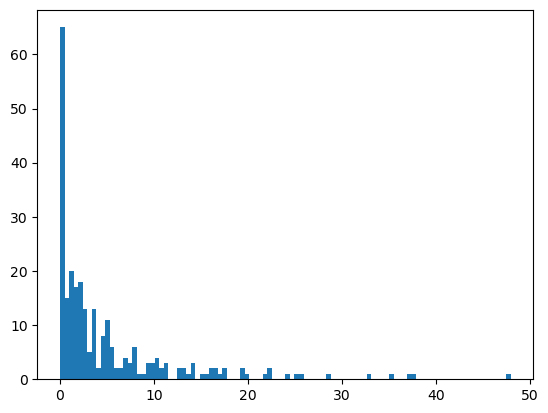

259


In [15]:
# find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# print historgram of contour areas
areas = [cv2.contourArea(c) for c in contours]
plt.hist(areas, bins=100, range=(0, max(areas)))
plt.show()

# print number of contours with area > 10
# print(len([x for x in areas if x > 10]))
print(len(contours))


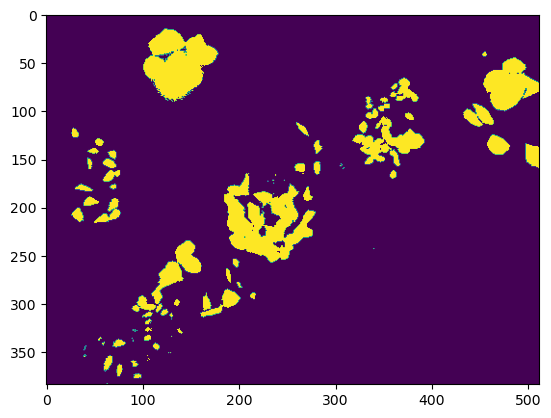

In [16]:
img = cv2.imread(str(gfp_files[16]))

img = img[:,:,1]
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
ret, thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)




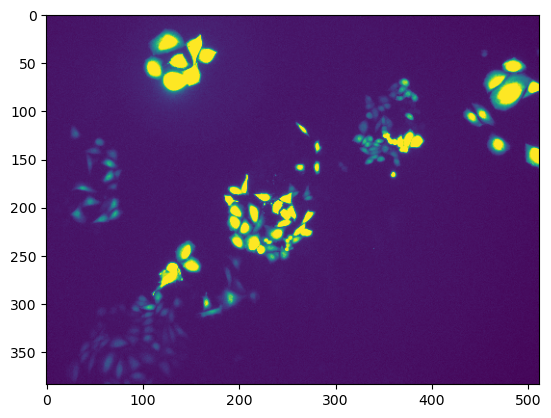

In [17]:
plt.imshow(img)
